# Homework 03
## Completed by: Mohammad Zoraiz

In this assignment, you will demonstrate your learning about creating data visualizations in Python using Seaborn. 

You should make sure any code that you write to answer the questions is included in this notebook. You are **required** to go to the Kernel option and choose **"Restart & Run All"**  before submission. Double check that your entire notebook runs correctly and generates the expected output. Finally, make sure to save your work (timestamp at the top tells you the last checkpoint and whether there are unsaved changes). When you finish, submit your assignment at [Gradescope](http://gradescope.com/ "‌"). **Submissions not prepared correctly as above will lose points.**

We will work with the `university_data.csv` dataset imported into the `uni` DataFrame below. We then preview the first few rows. It contains information about 311 universities in the United States including average student test scores and gpa, tuition costs, the state in which the school is located, the ranking, etc.

In [1]:
# Run but do not modify this code
try:
    import seaborn as sns
    print(sns.__version__, "# If you are running a version < 0.11, the next cell will not work! Make sure to update your seaborn library")
except Exception as e:
    %pip install seaborn
    import seaborn as sns

0.13.2 # If you are running a version < 0.11, the next cell will not work! Make sure to update your seaborn library


In [2]:
import matplotlib.pyplot as plt

In [3]:
# Run but do not modify this code
sns.set_theme()
sns.set_context('talk')

In [4]:
# Run but do not modify this code
import pandas as pd
sns.set_theme()
uni = pd.read_csv("university_data.csv")
print(uni.shape)
uni.head()

(311, 13)


,act_avg,sat_avg,enrollment,city,acceptance_rate,percent_receiving_aid,cost_after_aid,state,hs_gpa_avg,tuition,Institution_name,institution_type,us_rank
0,32.0,1400.0,5400.0,Princeton,7.0,60.0,16793.0,NJ,3.9,47140,Princeton University,private,1.0
1,32.0,1430.0,6710.0,Cambridge,5.0,55.0,16338.0,MA,4.0,48949,Harvard University,private,2.0
2,32.0,1450.0,5941.0,Chicago,8.0,42.0,27767.0,IL,4.0,54825,University of Chicago,private,3.0
3,32.0,1420.0,5472.0,New Haven,6.0,50.0,18385.0,CT,NaN,51400,Yale University,private,3.0
4,32.0,1430.0,6113.0,New York,6.0,48.0,21041.0,NY,NaN,57208,Columbia University,private,5.0


### Question 1 (16 points total, 4 points per sub-question)
1. Generate a scatterplot of `tuition` on the horizontal `x` axis and `sat_avg` on the vertical `y` axis.
2. Generate the same scatterplot as in step 1, but color the points according to `institution_type`.

In the cell after the cell that says "Answer 1".

3. Pick a dot in the scatterplot from step 2 and write out what that dot represents.
4. Briefly interpret the two visualizations.
    1. What does it show about the correlation between `tuition` and `sat_avg`?
    2. What does it show about the difference between `public` and `private` institutions?

<!-- BEGIN QUESTION -->



<Axes: xlabel='tuition', ylabel='sat_avg'>

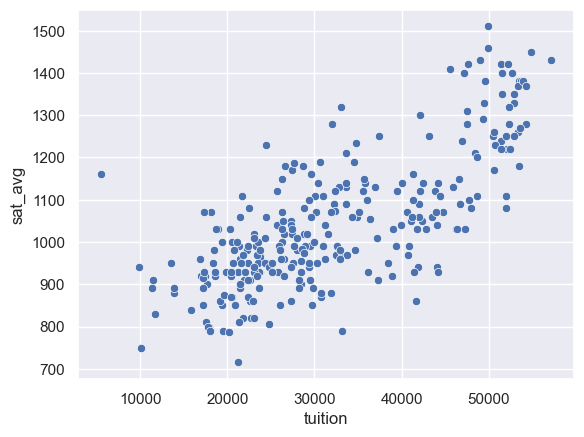

In [5]:
# Put your code for question 1.1 here
sns.scatterplot(data=uni, x='tuition', y='sat_avg')

<Axes: xlabel='tuition', ylabel='sat_avg'>

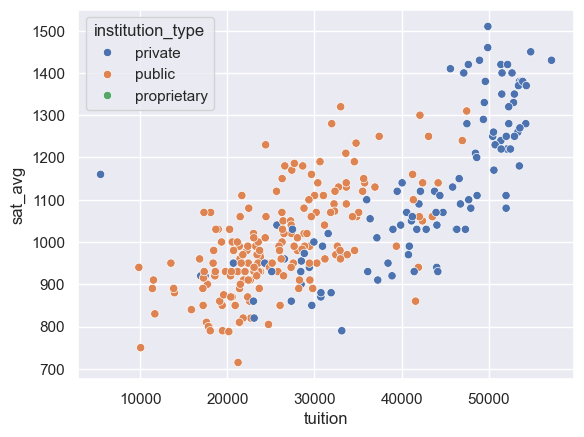

In [6]:
# Put your code for question 1.2 here
...
sns.scatterplot(data=uni, x='tuition', y='sat_avg', hue='institution_type')

<!-- END QUESTION -->

### Answer 1

**1.3:** The orange dot in the far upper right corner of the scatterplot represents a private institution with both very high tuition and very high average SAT scores. This point shows how some private universities successfully combine premium pricing with selective admissions, likely because their higher costs fund resources and reputation that attract top performing students.

**1.4:** The scatterplots show a positive correlation between tuition and average SAT scores, meaning schools with higher tuition tend to enroll students with higher test scores. This pattern suggests that expensive schools can invest in better facilities and programs that appeal to academically strong applicants. The color coding reveals that private schools cluster in the upper right region with high tuition and high SAT scores, while public schools are concentrated in the lower left with more affordable tuition and more varied SAT distributions, reflecting their different funding models and accessibility missions.


<!-- END QUESTION -->

### Question 2.1 (4 points)

Below, we plot a histogram of `hs_gpa_avg`, the average high school gpa, for the schools. We set the `bins` manually. Identify at least two problems with our setting of `bins` that make the histogram difficult to read and or misleading. You do not need to replot the histogram to answer this question, but you are welcome to modify the `bins` parameter to see what different settings would give you in the visualization. Put your answer in `Answer 2.1` cell.

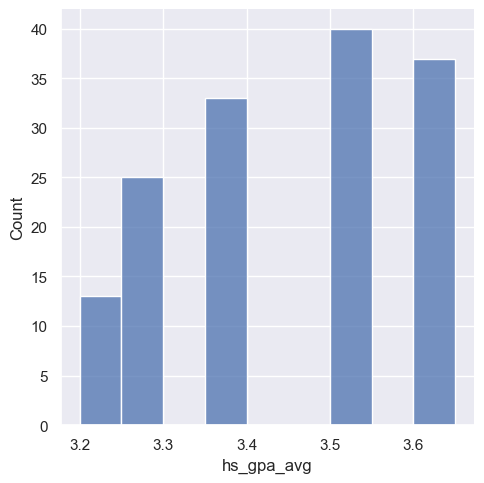

In [7]:
# Run this code, can modify to experiment but not required, answer below
sns.displot(data=uni, x="hs_gpa_avg", bins=[3.2 + 0.05*i for i in range(10)])

### Answer 2.1

**2.1**: The histogram makes it hard to interpret the distribution of high school GPA because the bins are too narrow, which makes the plot look choppy and exaggerates small differences between schools. Also, the number of bins means several may have almost no data, causing the plot to look misleadingly empty in spots where there are actually just a few missing values. When you look at the plot, it is tough to see where most schools actually fall or what a typical GPA is, since the bars are thin and uneven. 


<!-- END QUESTION -->

### Question 2.2 (4 points)

Below we plot a heat map that visualizes the relationship between `hs_gpa_avg` on the horizontal `x` axis and `sat_avg` on the vertical `y` axis. It looks like there is a strong relationship between `hs_gpa_avg` and `sat_avg`. Suppose someone interprets this plot by saying "Look, every student who has a good high school gpa of 3.75 or above gets a SAT score of at least 900 or so." Why is this not necessarily true? Put your answer in "Answer 2.2" cell.

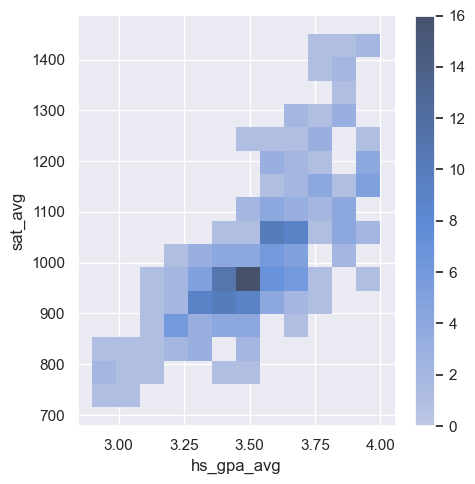

In [8]:
# Run this code, can modify to experiment but not required, answer below
sns.displot(data=uni, x="hs_gpa_avg", y="sat_avg", cbar=True)

### Answer 2.2

**2.2**: A high average GPA paired with a high SAT score shown in the heatmap does not mean that every individual student in those schools has both. The plot reflects summary data from each institution, not data for every student, so we cannot claim that each person with a strong GPA automatically has a high SAT score. 


<!-- END QUESTION -->

### Question 3 (16 points total, 4 points per sub-question, 2 autograder 14 manual points)
1. Generate a bar plot showing the difference in the distribution of `hs_gpa_avg` between `public` and `private` schools. That is, there should be two bars showing the average values with confidence intervals of `hs_gpa_avg` for `public` vs. `private` schools. There are a small number of `proprietary` schools in the dataset which are missing data in this category; filter those out so they do not appear in this visualization. Put the filtered data in `no_proprietary`.

2. Visualize the same information as in step 1, but using a box plot to visualize the distributions. As in step 1, do not include `proprietary` schools in the visualization.

In "Answer 3" cell:

3. Pick either private or public and write out what the corresponding bar and box plot means.
4. Briefly compare the plots, especially explaining what information the box plot visualizes that was not clear in the earlier bar plot.

<Axes: xlabel='institution_type', ylabel='hs_gpa_avg'>

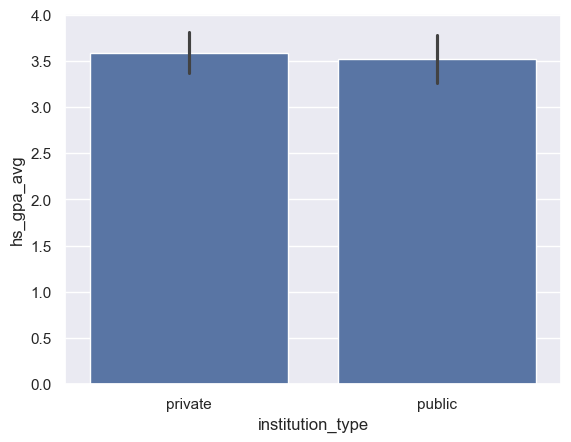

In [9]:
# Put your code for 3.1 here
no_proprietary = uni[uni["institution_type"].isin(["public", "private"])]
sns.barplot(data=no_proprietary, x="institution_type", y="hs_gpa_avg", errorbar="sd")

<Axes: xlabel='institution_type', ylabel='hs_gpa_avg'>

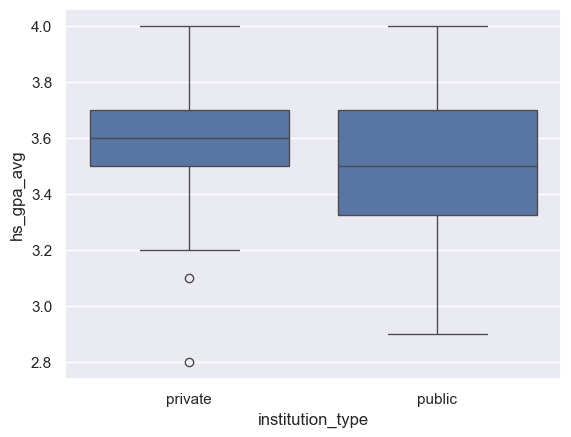

In [10]:
# Put your code for 3.2 here
sns.boxplot(data=no_proprietary, x="institution_type", y="hs_gpa_avg")

### Answer 3

For public schools, the bar plot shows the average high school GPA of admitted students at these institutions along with the variation among schools. The box plot gives a fuller picture by showing the spread and any outliers in GPA values, which the bar plot alone doesn't reveal.

<!-- END QUESTION -->

### Question 4 (12 points total, 4 points per sub-question)
1. Generate a line plot of `us_rank` on the horizontal `x` axis and `tuition` on the vertical `y` axis. The plot should have the confidence intervals visible (light colored area around the dark line), which is the default setting in `seaborn`.
2. In a single figure, plot the same line as in step 2 in one color and another line for `cost_after_aid` on the vertical `y` axis in a different color. Use the same `us_rank` ordering on the horizontal `x` axis for both. Note that you may need to wrangle your data somewhat to produce this on the same plot rather than directly using the `uni` dataframe.
3. In step 2 we plotted `tuition` and `cost_after_aid` on the same vertical `y` axis. Briefly explain why that was reasonable, but it would not make sense to plot `tuition` and `enrollment` on the same vertical `y` axis in the same way. Explain in "Answer 4" cell.

<!-- BEGIN QUESTION -->



<Axes: xlabel='us_rank', ylabel='tuition'>

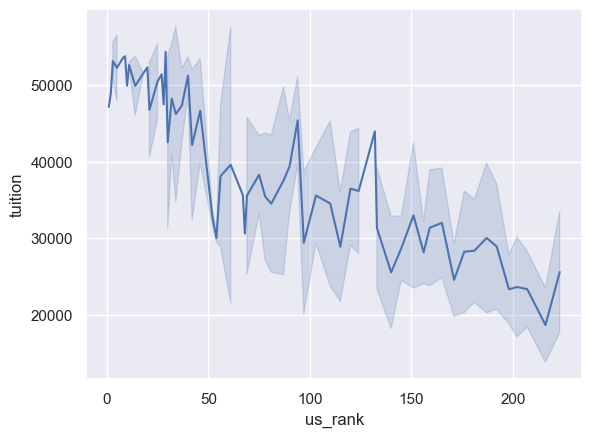

In [11]:
# Put your code for 4.1 here'
sns.lineplot(data=uni, x="us_rank", y="tuition", errorbar="sd")


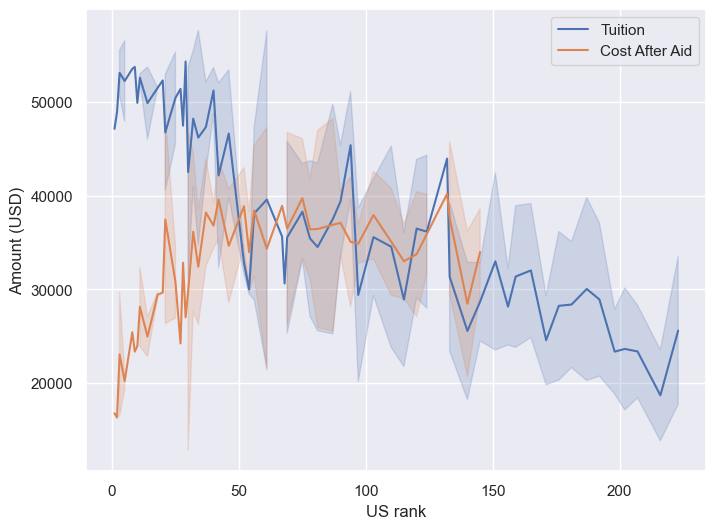

In [12]:
# Put your code for 4.2 here
plt.figure(figsize=(8,6))

sns.lineplot(data=uni, x="us_rank", y="tuition", errorbar="sd", label="Tuition")
sns.lineplot(data=uni, x="us_rank", y="cost_after_aid", errorbar="sd", label="Cost After Aid")

plt.xlabel("US rank")
plt.ylabel("Amount (USD)")
plt.legend()
plt.show()

<!-- END QUESTION -->

### Answer 4

**4.3:** It makes sense to plot tuition and cost after aid on the same y-axis because both variables are measured in dollars and represent different aspects of the same financial concept, allowing us to directly compare how much students pay before and after financial assistance. However, tuition and enrollment cannot share the same y-axis because they use completely different units and measure fundamentally different things, with tuition in dollars and enrollment as a count of students, making any visual comparison on a single scale meaningless and misleading.


<!-- END QUESTION -->

### Question 5 (18 points, 16 manual points)

Having now explored the data in various ways, in this question, you will analyze the data yourself by doing the following:
1. Add a new column using at least 2 columns, which is a new statistic about the data per row. Put the new column's name in `new_stat_name`.
2. Plot this new column with a visualization of your choice. You may use other columns as well in the visualization if it helps explain your new column.

In the written part of this question, provide an explanation of the following:
1. What does your statistic mean in your `new_stat_name` column?
2. How to calculate your new per-row statistic.
3. Pick a single spot on the plot and describe it by filling out the sentence "The __ on the chart means __ ." (you may use these exact words)

    a. Make sure it is clear what spot you are referring to and you are "pointing" it out without using its data values (otherwise, that's like defining a word while using the word in the definition). For example, "the top right blue dot" or "the shortest red bar," as opposed to "the top right public school dot" or the "the bar for Princeton."
    
    b. If using something like a histogram, be precise about what is inclusive vs. exclusive. For example, “it includes up to 10” is not the same as “it includes up to and including 10.”
4. Why did you choose that function and use any deviations from the default behavior of that function? Discuss this at least partially in terms of the insight you sought from the plot.


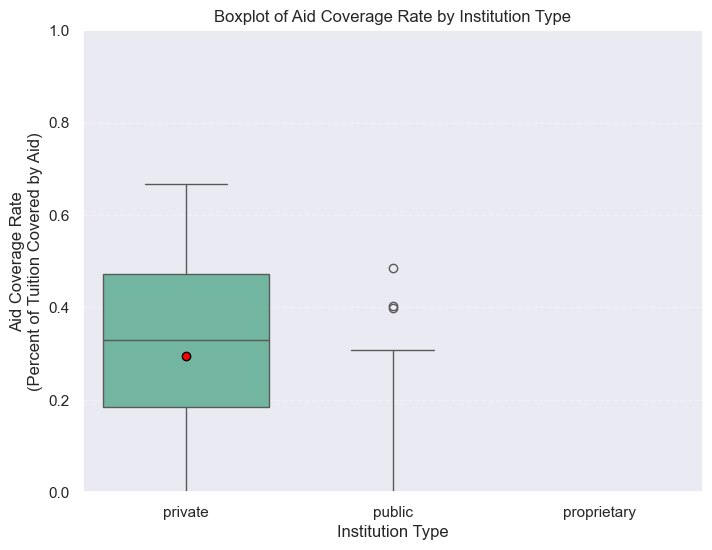

In [13]:
# Put your code for question 5 here
# aid_coverage_rate = percent of tuition covered by financial aid on average after aid.
# box plot

uni["aid_coverage_rate"] = (uni["tuition"] - uni["cost_after_aid"]) / uni["tuition"]
new_stat_name = "aid_coverage_rate"

plt.figure(figsize=(8,6))
sns.boxplot(data=uni, x="institution_type", y="aid_coverage_rate", palette="Set2", hue = "institution_type", showcaps=True, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black"})
plt.title("Boxplot of Aid Coverage Rate by Institution Type")
plt.xlabel("Institution Type")
plt.ylabel("Aid Coverage Rate\n(Percent of Tuition Covered by Aid)")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

### Answer 5

**5.1**: The new_stat_name column, "aid_coverage_rate," measures the fraction of tuition that is covered by financial aid for each institution, helping us understand how much of the sticker price is offset for students who get aid.

**5.2**: To calculate it, for every row I subtract the average cost after aid from the full tuition, then divide by the tuition amount, so it shows the proportion of tuition not paid out of pocket after aid.

**5.3**: The blue box representing public schools shows a wider spread than the orange box for private schools on the plot. The highest point in the blue box means there are some public schools where aid covers nearly all of tuition.

**5.4**: I picked a box plot because it quickly shows both the variability and the typical value of aid coverage within each type of school, highlighting that private institutions generally have more consistent aid coverage while public schools show more dramatic differences. My goal was to see if school type impacts how much aid actually helps students, and this chart makes that comparison clear.



<!-- END QUESTION -->

## AI Disclosure

Conceptualization: I used ChatGPT to clarify what each question was asking and to confirm my understanding of how to approach the problems conceptually. 

Methodology: I used ChatGPT to check whether my intended use of some charting functions aligned with best practices and the assignment’s requirement to avoid for-loops. The final code reflects my understanding of these methods.

Debugging: I used ChatGPT to identify and correct mistakes in my initial implementations, such as improperly selecting rows or not charting the right things formatting it incorrectly and things like that 

Writing — Review & Editing: I wrote my own explanation for the custom statistic in Question 5 and then used ChatGPT to help revise it to be clearer, more concise, and aligned with the grading rubric, without changing the underlying meaning. I also used breifly on some of the other question to check and improve grammar and comprehensibility

<!-- END QUESTION -->

## Submitting

You should make sure any code that you write to answer the questions is included in this notebook. You are **required** to go to the Kernel option and choose **"Restart & Run All"**  before submission. Double check that your entire notebook runs correctly and generates the expected output. Finally, make sure to save your work (timestamp at the top tells you the last checkpoint and whether there are unsaved changes). When you finish, submit your assignment at [Gradescope](http://gradescope.com/ "‌"). **Submissions not prepared correctly as above will lose points.**